---

# Lecture 5.2 Creating a Python Module for the Single Neuron Model 
Wee have thus far learned three basic single neuron models, namely:
 
1. The Perceptron Single Neuron model (Binary Classification)
2. The Linear Regression Single Neuron Model (Regression)
3. The Logistic Regression Single Neuron Model (Binary Classification)

Each of these models fall in the framework depicted below.


<p align="center">
    <img src="general_single_neuron.png" width="500">
</p>



Moreover, we can train (or *fit*) the weights and bias for each of these models with the same stochastic gradient descent rule (discrete approximate to this in the case of the Perceptron):

$$
\overline{\mathbf{w}} \leftarrow \overline{\mathbf{w}} - \alpha \nabla C(\overline{\mathbf{w}})
$$

Next notice that we have had to define our custom ```SingleNeuron``` class in each of the previous three jupyter notebook that we have worked with. As mentioned at the beginning of the semester, **any time we are repeating code more than two times, we are probably not programming in the most efficient way.** 

---

## Lecture 5.2.1 Python Modules
This notebook explores the notion of Python modules and Python packages with respect to our single neuron model. Using a description given in [this article](https://realpython.com/python-modules-packages/), observe the following. 

**Modular programming** refers to the process of breaking a large, unwieldy programming task into separate, smaller, more manageable subtasks or modules. Individual modules can then be cobbled together like building blocks to create a larger application.

There are several advantages to modularizing code in a large application.

**Simplicity:** Rather than focusing on the entire problem at hand, a module typically focuses on one relatively small portion of the problem. If you’re working on a single module, you’ll have a smaller problem domain to wrap your head around. This makes development easier and less error-prone.

**Maintainability:** Modules are typically designed so that they enforce logical boundaries between different problem domains. If modules are written in a way that minimizes interdependency, there is decreased likelihood that modifications to a single module will have an impact on other parts of the program. (You may even be able to make changes to a module without having any knowledge of the application outside that module.) This makes it more viable for a team of many programmers to work collaboratively on a large application.

**Reusability:** Functionality defined in a single module can be easily reused (through an appropriately defined interface) by other parts of the application. This eliminates the need to duplicate code.

**Scoping:** Modules typically define a separate namespace, which helps avoid collisions between identifiers in different areas of a program. (One of the tenets in the Zen of Python is Namespaces are one honking great idea—let’s do more of those!)


### The General Idea 
Basically, we want to partion our Python classes and functions into seperate *Python scripts* with the ``.py`` extension in a single directory and subdirectories which **acts as a Python object** which was can then import and use like any other object in Python. To understand the basic structure we will design, consider the following directory structure shown in the figure below, where the directories highlighted in red are Python modules (image files not shown).

<p align="center">
    <img src="python_modules.png" width="500">
</p>


---

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("Datasets/iris_dataset.csv")

X = df[["sepal_length", "sepal_width"]].iloc[:100].values
#X = X.reshape(-1, 1)

# Set classification target labels for the perceptron model
perceptron_targets = np.where(df.iloc[:100].species == "versicolor", 1, -1)

# Set the target labels for the logistic regression model
logistic_targets = np.where(df.iloc[:100].species == "versicolor", 0, 1)



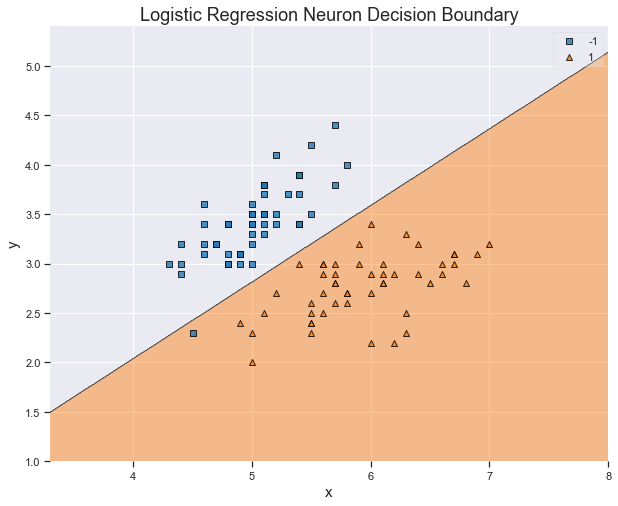

In [4]:
import models.single_neuron as node

clf1 = node.Perceptron_Neuron()
clf1.train(X, perceptron_targets, alpha = 0.01, epochs = 1000)
clf1.plot_decision_boundary(X, perceptron_targets)

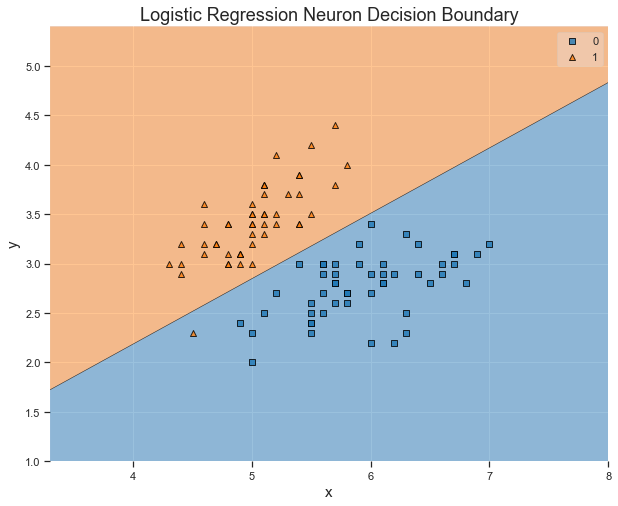

In [5]:
clf1 = node.Logistic_Regression_Neuron()
clf1.train(X, logistic_targets, alpha = 0.01, epochs = 1000)
clf1.plot_decision_boundary(X, logistic_targets)

In [ ]:
y_percep

In [ ]:
np.rint(clf1.predict(X))
